In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, ensemble, tree

# Load the data

In [2]:
digits = datasets.load_digits()

In [4]:
X = digits.data
y = digits.target

# Compare the estimators

In [66]:
def write_answer(answer, k):
    with open(f'{k}.txt', 'w') as f:
        f.write(str(answer))
        
def get_mean_cv(estimator, n=10):
    cv = []
    for _ in range(n):
        scores = model_selection.cross_val_score(estimator, X, y, cv=10, n_jobs=-1)
        cv.append(scores.mean())
    
    return np.array(cv).mean()

In [67]:
estimator_1 = tree.DecisionTreeClassifier()
score_1 = get_mean_cv(estimator_1)

print(score_1)
write_answer(score_1, 1)

0.8289930483920587


In [68]:
estimator_2 = ensemble.BaggingClassifier(n_estimators=100)
score_2 = get_mean_cv(estimator_2)

print(score_2)
write_answer(score_2, 2)

0.9238511336393612


In [69]:
estimator_3 = ensemble.BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score_3 = get_mean_cv(estimator_3)

print(score_3)
write_answer(score_3, 3)

0.9320971443503311


In [70]:
estimator_4 = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features='sqrt'), n_estimators=100)
score_4 = get_mean_cv(estimator_4)

print(score_4)
write_answer(score_4, 4)

0.9514348237873012


In [72]:
estimator_5 = ensemble.RandomForestClassifier(max_features='sqrt', n_estimators=100)
score_5 = get_mean_cv(estimator_5)

print(score_5)

0.9515296791764506


# Explore RandomForestClassifier score depending on parameters

## Number of trees

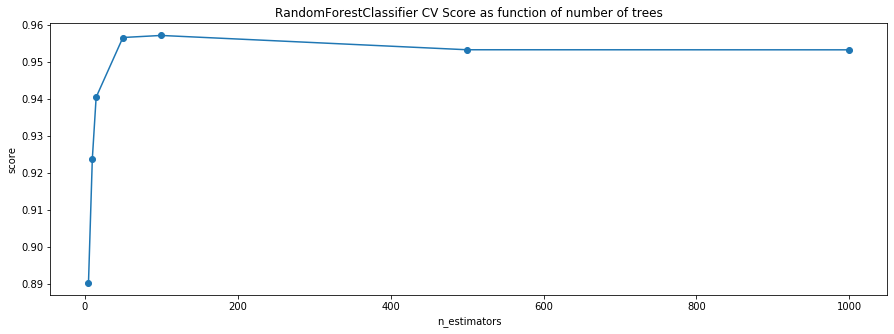

In [51]:
n_estimators = [5, 10, 15, 50, 100, 500, 1000]

scores = []
for k in n_estimators:
    estimator = ensemble.RandomForestClassifier(n_estimators=k, random_state=1)
    scores.append(model_selection.cross_val_score(estimator, X, y, cv=10, n_jobs=-1).mean())

plt.figure(figsize=(15, 5))
plt.plot(n_estimators, scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('RandomForestClassifier CV Score as function of number of trees')
plt.show()

- Случайный лес не переобучается с ростом количества деревьев.
- При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.
- С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

## Max features

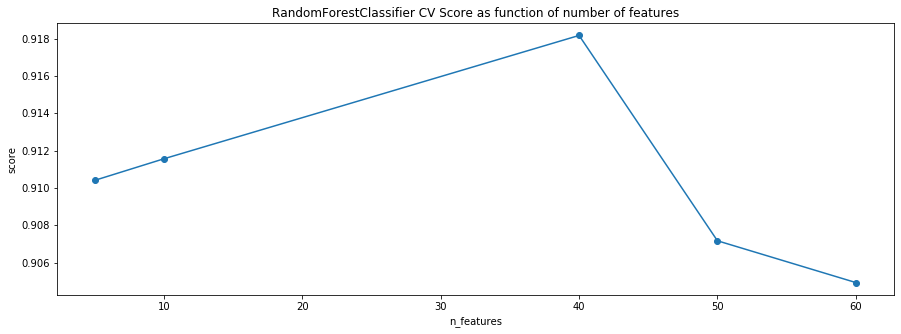

In [52]:
n_features = [5, 10, 40, 50, 60]

scores = []
for k in n_features:
    estimator = ensemble.RandomForestClassifier(max_features=k, random_state=1)
    scores.append(model_selection.cross_val_score(estimator, X, y, cv=10, n_jobs=-1).mean())

plt.figure(figsize=(15, 5))
plt.plot(n_features, scores, marker='o')
plt.xlabel('n_features')
plt.ylabel('score')
plt.title('RandomForestClassifier CV Score as function of number of features')
plt.show()

-  При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

## Max depth

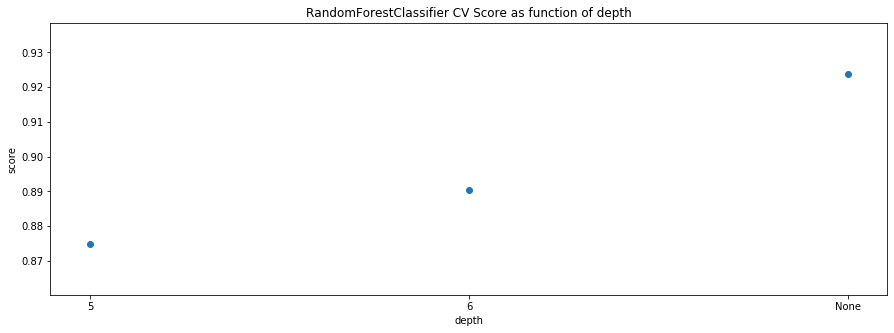

In [56]:
depths = [5, 6, None]

scores = []
for k in depths:
    estimator = ensemble.RandomForestClassifier(max_depth=k, random_state=1)
    scores.append(model_selection.cross_val_score(estimator, X, y, cv=10, n_jobs=-1).mean())

plt.figure(figsize=(15, 5))
plt.scatter(list(map(str, depths)), scores, marker='o')
plt.xlabel('depth')
plt.ylabel('score')
plt.title('RandomForestClassifier CV Score as function of depth')
plt.show()

-  При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [73]:
write_answer('2 3 4 7', 5)